In [1]:
# EDA Libraries:

import pandas as pd
import numpy as np

import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
from pathlib import Path  
import random

# Scikit-Learn models:

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
#from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.impute import SimpleImputer

# LSTM:

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
#from keras.utils import np_utils
from keras.layers import LSTM , Dense, Dropout

In [2]:
#import dataframes
data_train = pd.read_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/train.csv')
data_test = pd.read_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/test.csv')
data_holiday = pd.read_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/holidays_events.csv')
data_oil = pd.read_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/oil.csv')
data_sub = pd.read_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/sample_submission.csv')
data_stores = pd.read_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/stores.csv')
data_trans = pd.read_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/transactions.csv')

In [3]:
## combine datasets
data_train1 = data_train.merge(data_oil, on = 'date', how='left')
data_train1 = data_train1.merge(data_holiday, on = 'date', how='left')
data_train1 = data_train1.merge(data_stores, on = 'store_nbr', how='left')
data_train1 = data_train1.merge(data_trans, on = ['date', 'store_nbr'], how='left')
data_train1 = data_train1.rename(columns = {"type_x" : "holiday_type", "type_y" : "store_type"})

In [4]:
new_data = data_train1[data_train1['locale_name'] == 'Ecuador']
cities = new_data['city'].unique().tolist()
new_data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047215,2993755,2017-08-11,9,POULTRY,525.224,22,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0
3047216,2993756,2017-08-11,9,PREPARED FOODS,112.100,3,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0
3047217,2993757,2017-08-11,9,PRODUCE,1453.078,6,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0
3047218,2993758,2017-08-11,9,SCHOOL AND OFFICE SUPPLIES,140.000,7,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0


In [5]:
new_data.to_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/original_data.csv')

In [6]:
data=pd.read_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/original_data.csv')

In [7]:
data

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261949,3047215,2993755,2017-08-11,9,POULTRY,525.224,22,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0
261950,3047216,2993756,2017-08-11,9,PREPARED FOODS,112.100,3,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0
261951,3047217,2993757,2017-08-11,9,PRODUCE,1453.078,6,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0
261952,3047218,2993758,2017-08-11,9,SCHOOL AND OFFICE SUPPLIES,140.000,7,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0


In [8]:
data.duplicated().any()

False

In [9]:
data

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
1,1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
2,2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
3,3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
4,4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261949,3047215,2993755,2017-08-11,9,POULTRY,525.224,22,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0
261950,3047216,2993756,2017-08-11,9,PREPARED FOODS,112.100,3,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0
261951,3047217,2993757,2017-08-11,9,PRODUCE,1453.078,6,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0
261952,3047218,2993758,2017-08-11,9,SCHOOL AND OFFICE SUPPLIES,140.000,7,48.81,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Quito,Pichincha,B,6,1848.0


In [10]:
data.isnull().any()

Unnamed: 0      False
id              False
date            False
store_nbr       False
family          False
sales           False
onpromotion     False
dcoilwtico       True
holiday_type    False
locale          False
locale_name     False
description     False
transferred     False
city            False
state           False
store_type      False
cluster         False
transactions     True
dtype: bool

In [11]:
# Supprimer les colonnes 'dcoilwtico' et 'transactions'
data.drop(['dcoilwtico', 'transactions'], axis=1, inplace=True)

# Afficher le DataFrame après la suppression des colonnes
print(data)


        Unnamed: 0       id        date  store_nbr  \
0                0        0  2013-01-01          1   
1                1        1  2013-01-01          1   
2                2        2  2013-01-01          1   
3                3        3  2013-01-01          1   
4                4        4  2013-01-01          1   
...            ...      ...         ...        ...   
261949     3047215  2993755  2017-08-11          9   
261950     3047216  2993756  2017-08-11          9   
261951     3047217  2993757  2017-08-11          9   
261952     3047218  2993758  2017-08-11          9   
261953     3047219  2993759  2017-08-11          9   

                            family     sales  onpromotion holiday_type  \
0                       AUTOMOTIVE     0.000            0      Holiday   
1                        BABY CARE     0.000            0      Holiday   
2                           BEAUTY     0.000            0      Holiday   
3                        BEVERAGES     0.000           

In [12]:
# Afficher les valeurs manquantes dans chaque colonne
print("Valeurs manquantes avant le traitement :")
print(data.isnull().sum())

# Identifier les colonnes numériques et non numériques
colonnes_numeriques = data.select_dtypes(include='number').columns
colonnes_non_numeriques = data.select_dtypes(exclude='number').columns

# Imputer les valeurs manquantes pour les colonnes numériques avec la moyenne
imputeur_numerique = SimpleImputer(strategy="mean")
data[colonnes_numeriques] = imputeur_numerique.fit_transform(data[colonnes_numeriques])

# Imputer les valeurs manquantes pour les colonnes non numériques avec la valeur la plus fréquente
imputeur_non_numerique = SimpleImputer(strategy="most_frequent")
data[colonnes_non_numeriques] = imputeur_non_numerique.fit_transform(data[colonnes_non_numeriques])

# Afficher les valeurs manquantes après le traitement
print("\nValeurs manquantes après le traitement :")
print(data.isnull().sum())

Valeurs manquantes avant le traitement :
Unnamed: 0      0
id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
city            0
state           0
store_type      0
cluster         0
dtype: int64

Valeurs manquantes après le traitement :
Unnamed: 0      0
id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
city            0
state           0
store_type      0
cluster         0
dtype: int64


In [13]:
print(data.describe())

         Unnamed: 0            id      store_nbr          sales  \
count  2.619540e+05  2.619540e+05  261954.000000  261954.000000   
mean   1.659472e+06  1.635203e+06      27.500000     416.751069   
std    7.928776e+05  7.793860e+05      15.585814    1330.727757   
min    0.000000e+00  0.000000e+00       1.000000       0.000000   
25%    9.867822e+05  9.725262e+05      14.000000       0.000000   
50%    1.916540e+06  1.891592e+06      27.500000      13.000000   
75%    2.210125e+06  2.176267e+06      41.000000     224.536750   
max    3.047219e+06  2.993759e+06      54.000000  124717.000000   

         onpromotion        cluster  
count  261954.000000  261954.000000  
mean        3.436451       8.481481  
std        15.930736       4.649743  
min         0.000000       1.000000  
25%         0.000000       4.000000  
50%         0.000000       8.500000  
75%         0.000000      13.000000  
max       720.000000      17.000000  


# Visualisation des ventes au fil du temps :

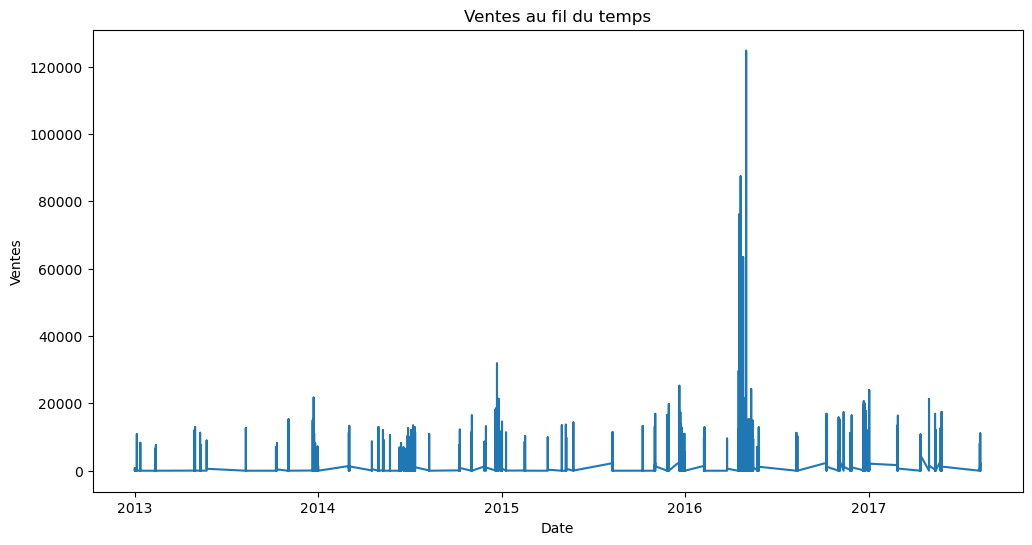

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la colonne 'date' en format de date si elle n'est pas déjà au bon format
data['date'] = pd.to_datetime(data['date'])

# Trier le DataFrame par date
data = data.sort_values('date')

# Plot des ventes au fil du temps
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['sales'])
plt.title('Ventes au fil du temps')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.show()

# Visualisation des ventes par type de magasin :

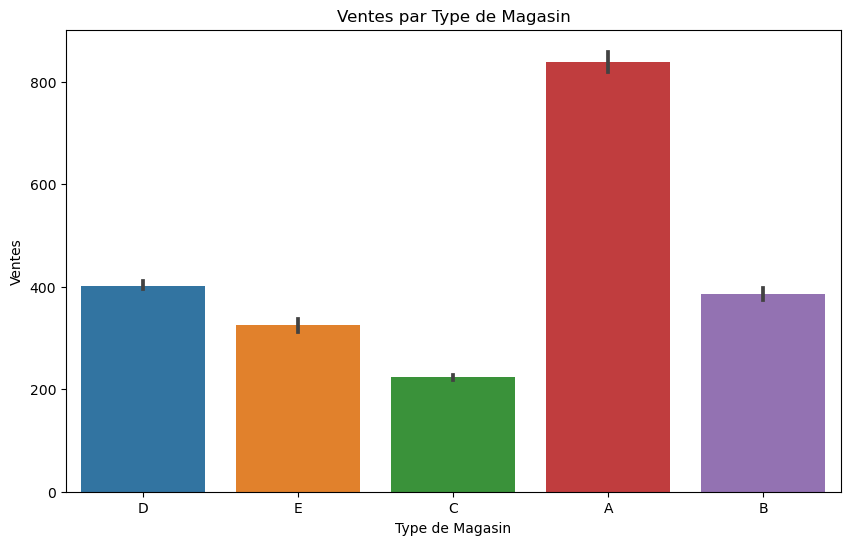

In [15]:
# Plot des ventes par type de magasin
plt.figure(figsize=(10, 6))
sns.barplot(x='store_type', y='sales', data=data)
plt.title('Ventes par Type de Magasin')
plt.xlabel('Type de Magasin')
plt.ylabel('Ventes')
plt.show()

# Diagramme en barres pour visualiser les ventes par cluster :

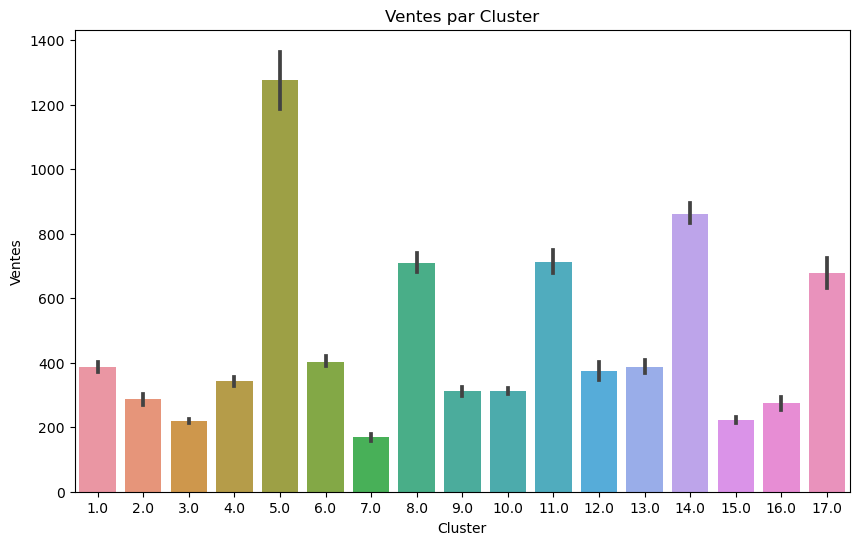

In [16]:
# Plot des ventes par cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='sales', data=data)
plt.title('Ventes par Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ventes')
plt.show()

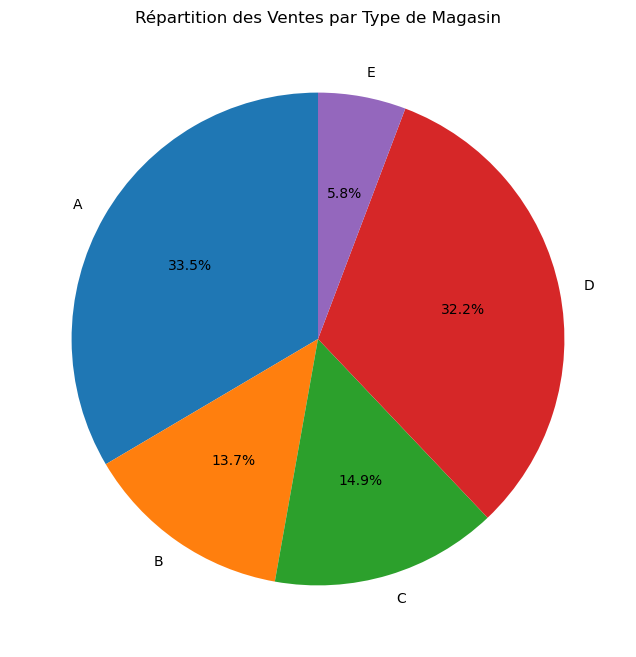

In [17]:
import matplotlib.pyplot as plt

# Créer un DataFrame pour stocker les ventes par type de magasin
sales_by_store_type = data.groupby('store_type')['sales'].sum().reset_index()

# Plot de la répartition des ventes par type de magasin avec un diagramme à secteurs
plt.figure(figsize=(8, 8))
plt.pie(sales_by_store_type['sales'], labels=sales_by_store_type['store_type'], autopct='%1.1f%%', startangle=90)
plt.title('Répartition des Ventes par Type de Magasin')
plt.show()

# Diagramme à barres pour visualiser les ventes par ville :

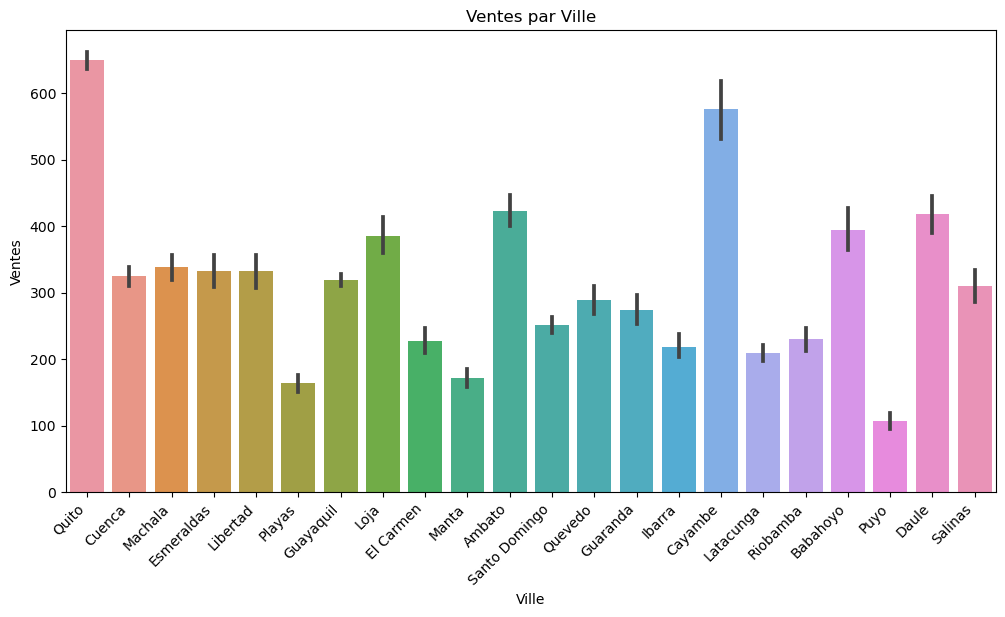

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot des ventes par ville avec un diagramme à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='sales', data=data)
plt.title('Ventes par Ville')
plt.xlabel('Ville')
plt.ylabel('Ventes')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()

#  pour visualiser la répartition des ventes par ville 


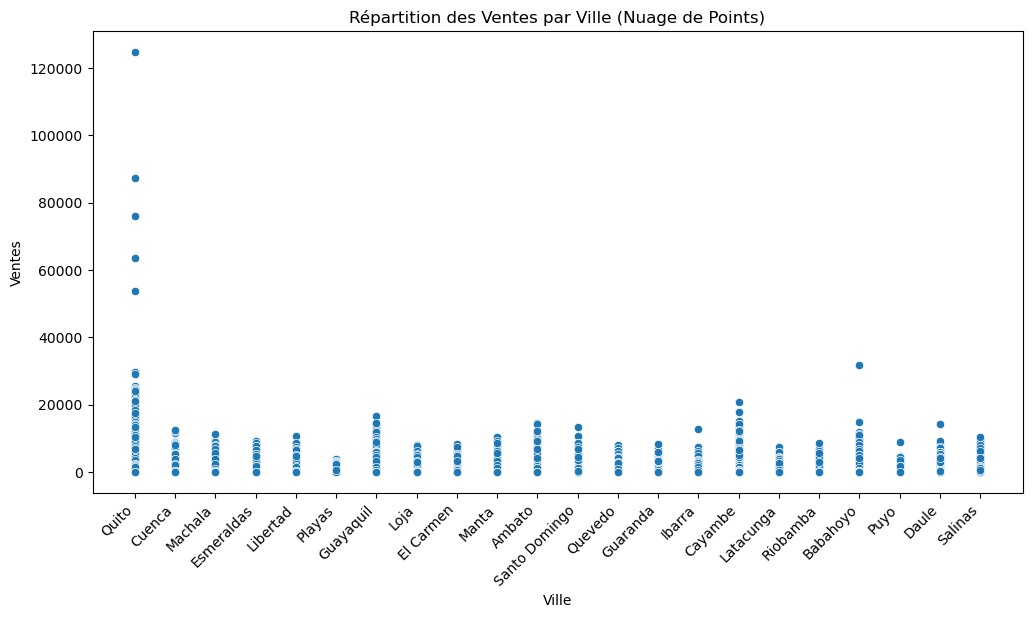

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un nuage de points pour la répartition des ventes par ville
plt.figure(figsize=(12, 6))
sns.scatterplot(x='city', y='sales', data=data)
plt.title('Répartition des Ventes par Ville (Nuage de Points)')
plt.xlabel('Ville')
plt.ylabel('Ventes')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()


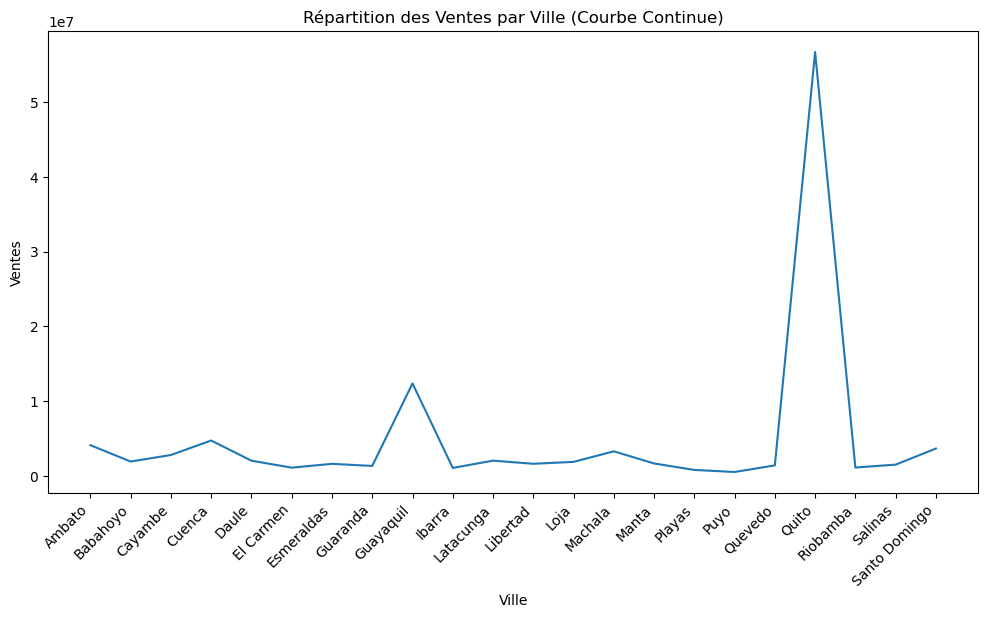

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un DataFrame pour stocker les ventes par ville
sales_by_city = data.groupby('city')['sales'].sum().reset_index()

# Plot de la répartition des ventes par ville avec une courbe continue
plt.figure(figsize=(12, 6))
sns.lineplot(x='city', y='sales', data=sales_by_city, sort=False)
plt.title('Répartition des Ventes par Ville (Courbe Continue)')
plt.xlabel('Ville')
plt.ylabel('Ventes')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()

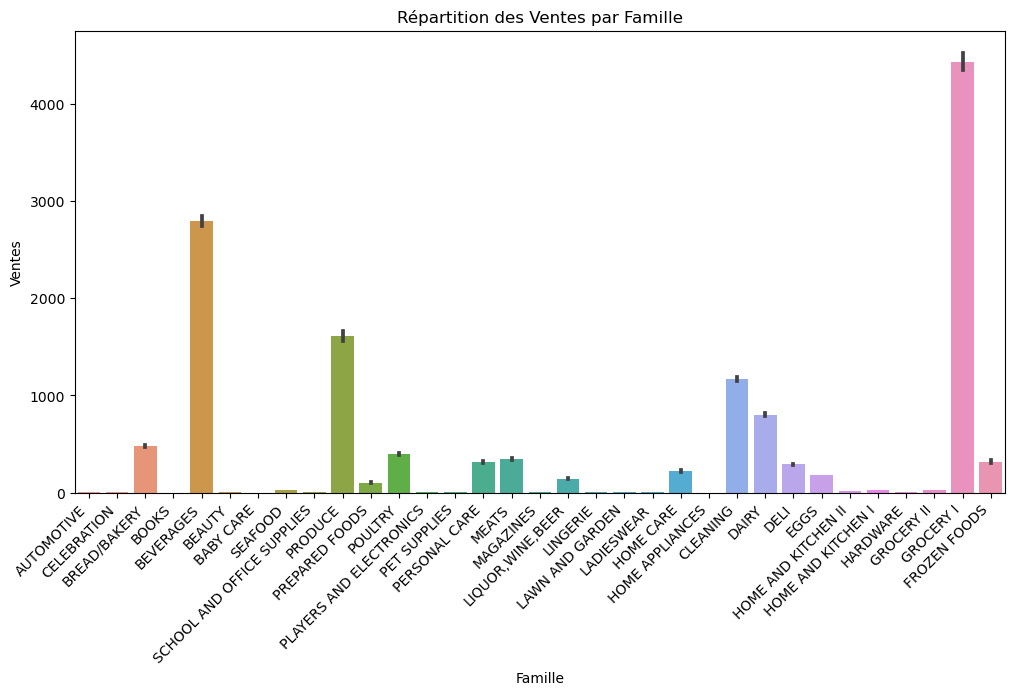

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot de la répartition des ventes par famille avec un diagramme à barres vertical
plt.figure(figsize=(12, 6))
sns.barplot(x='family', y='sales', data=data)
plt.title('Répartition des Ventes par Famille')
plt.xlabel('Famille')
plt.ylabel('Ventes')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()

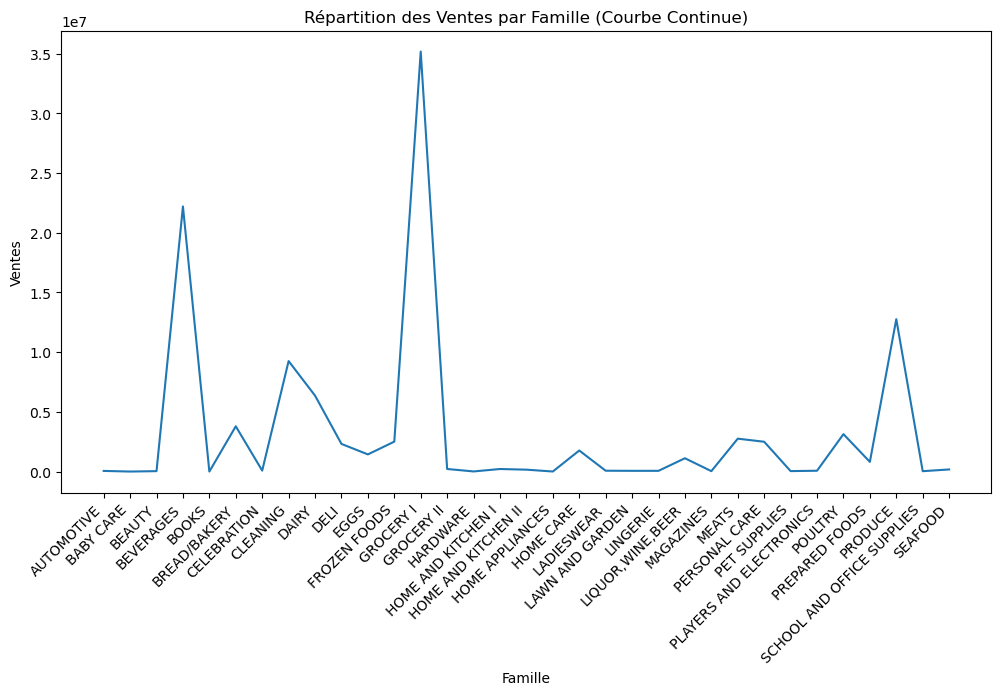

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un DataFrame pour stocker les ventes par famille
sales_by_family = data.groupby('family')['sales'].sum().reset_index()

# Plot de la répartition des ventes par famille avec une courbe continue
plt.figure(figsize=(12, 6))
sns.lineplot(x='family', y='sales', data=sales_by_family, sort=False)
plt.title('Répartition des Ventes par Famille (Courbe Continue)')
plt.xlabel('Famille')
plt.ylabel('Ventes')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.show()

# Prepared data for model

In [23]:
data

,Unnamed: 0,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,city,state,store_type,cluster
0,0.0,0.0,2013-01-01,1.0,AUTOMOTIVE,0.000,0.0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13.0
1194,1194.0,1194.0,2013-01-01,42.0,CELEBRATION,0.000,0.0,Holiday,National,Ecuador,Primer dia del ano,False,Cuenca,Azuay,D,2.0
1193,1193.0,1193.0,2013-01-01,42.0,BREAD/BAKERY,0.000,0.0,Holiday,National,Ecuador,Primer dia del ano,False,Cuenca,Azuay,D,2.0
1192,1192.0,1192.0,2013-01-01,42.0,BOOKS,0.000,0.0,Holiday,National,Ecuador,Primer dia del ano,False,Cuenca,Azuay,D,2.0
1191,1191.0,1191.0,2013-01-01,42.0,BEVERAGES,0.000,0.0,Holiday,National,Ecuador,Primer dia del ano,False,Cuenca,Azuay,D,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260759,3046025.0,2992565.0,2017-08-11,25.0,PET SUPPLIES,13.000,0.0,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Salinas,Santa Elena,D,1.0
260758,3046024.0,2992564.0,2017-08-11,25.0,PERSONAL CARE,257.000,11.0,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Salinas,Santa Elena,D,1.0
260757,3046023.0,2992563.0,2017-08-11,25.0,MEATS,597.431,45.0,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Salinas,Santa Elena,D,1.0
260768,3046034.0,2992574.0,2017-08-11,26.0,BEAUTY,1.000,1.0,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,Guayaquil,Guayas,D,10.0


In [24]:
def monthlyORyears_sales(data,time=['monthly','years']):
    data = data.copy()
    if time == "monthly":
        # Drop the day indicator from the date column:
        data.date = data.date.apply(lambda x: str(x)[:-3])
    else:
        data.date = data.date.apply(lambda x: str(x)[:4])
        
   # Sum sales per month: 
    data = data.groupby('date')['sales'].sum().reset_index()
    data.date = pd.to_datetime(data.date)
        
    return data


In [25]:
m_df = monthlyORyears_sales(data,"monthly")

m_df.to_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/monthly_data.csv')

In [26]:
m_df

,date,sales
0,2013-01-01,2511.618999
1,2013-01-05,477350.121229
2,2013-01-12,403258.212011
3,2013-02-11,278627.588926
4,2013-02-12,308800.790912
...,...,...
138,2017-05-14,884199.913839
139,2017-05-24,746303.627126
140,2017-05-26,984511.152114
141,2017-08-10,651386.911970


In [27]:
y_df = monthlyORyears_sales(data,"years")
y_df

,date,sales
0,2013-01-01,9.682192e+06
1,2014-01-01,2.400498e+07
2,2015-01-01,1.660043e+07
3,2016-01-01,4.851595e+07
4,2017-01-01,1.036605e+07


In [28]:
y_df = pd.DataFrame(y_df)

# Affichez le DataFrame avec les valeurs de sales sous forme numérique standard
pd.options.display.float_format = '{:.2f}'.format
print(y_df)

        date       sales
0 2013-01-01  9682192.12
1 2014-01-01 24004980.90
2 2015-01-01 16600432.51
3 2016-01-01 48515950.31
4 2017-01-01 10366053.72


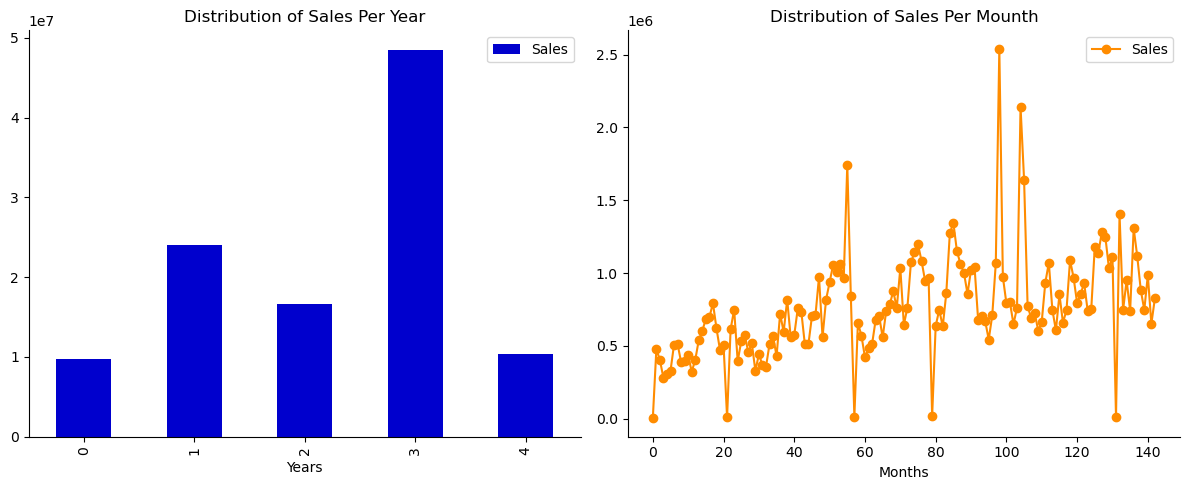

In [29]:
layout = (1, 2)

raw = plt.subplot2grid(layout, (0 ,0))
law = plt.subplot2grid(layout, (0 ,1))

years = y_df['sales'].plot(kind = "bar",color = 'mediumblue', label="Sales",ax=raw, figsize=(12,5))
months = m_df['sales'].plot(marker = 'o',color = 'darkorange', label="Sales", ax=law)

years.set(xlabel = "Years",title = "Distribution of Sales Per Year")
months.set(xlabel = "Months", title = "Distribution of Sales Per Mounth")

sns.despine()
plt.tight_layout()

years.legend()
months.legend()

# # Data Exploration (EDA)

In [30]:
def sales_time(data):
    """Time interval of dataset:"""

    data.date = pd.to_datetime(data.date)
    n_of_days = data.date.max() - data.date.min()
    n_of_years = int(n_of_days.days / 365)
    
    print(f"Days: {n_of_days.days}\nYears: {n_of_years}\nMonth: {12 * n_of_years}")

In [31]:
sales_time(data)

Days: 1683
Years: 4
Month: 48


In [32]:
# Overall for 4 years:

average_m_sales = m_df.sales.mean()
print(f"Overall Avarage Monthly Sales: ${average_m_sales}")

def avarage_12months():
# Last 1 years (this will be the forecasted sales):
    average_m_sales_1y = m_df.sales[-12:].mean()
    print(f"Last 12 months average monthly sales: ${average_m_sales_1y}")
avarage_12months()

Overall Avarage Monthly Sales: $763423.843047826
Last 12 months average monthly sales: $863837.8100806418


 # Determining Time Series Stationary

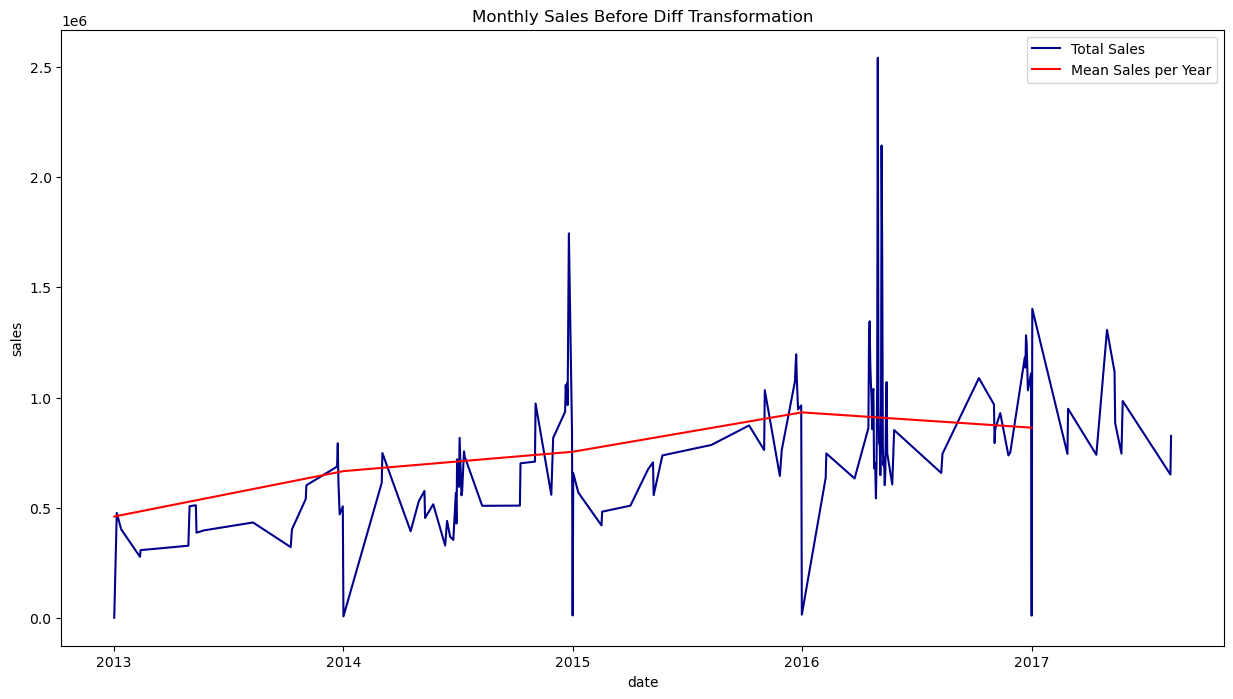

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def time_plot(data, x_col, y_col, title):
    fig, ax = plt.subplots(figsize=(15, 8))
    sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='darkblue', label='Total Sales')
    
    s_mean = data.groupby(data[x_col].dt.year)[y_col].mean().reset_index()
    s_mean[x_col] = pd.to_datetime(s_mean[x_col], format='%Y')
    sns.lineplot(x=x_col, y=y_col, data=s_mean, ax=ax, color='red', label='Mean Sales per Year')

    ax.set(xlabel=x_col, ylabel=y_col, title=title)
    ax.legend()
    plt.show()

# Assuming m_df is your DataFrame
time_plot(m_df, 'date', 'sales', 'Monthly Sales Before Diff Transformation')


# Differencing

In [34]:
def get_diff(data):
    """Calculate the difference in sales month over month:"""
    
    data['sales_diff'] = data.sales.diff()
    data = data.dropna()
    
    data.to_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/stationary_df.csv')
    
    return data

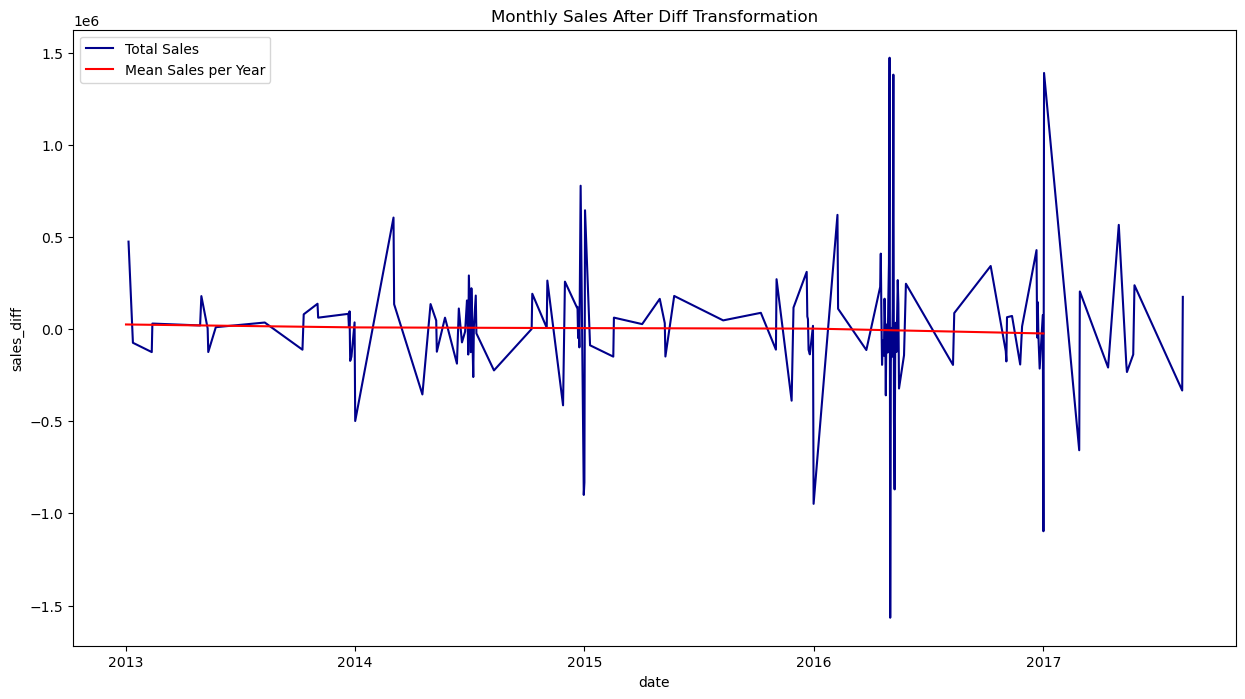

In [35]:
stationary_df = get_diff(m_df)
time_plot(stationary_df, 'date', 'sales_diff', 
          'Monthly Sales After Diff Transformation')

#  Preparing Dataset Modeling


In [36]:
stationary_df

,date,sales,sales_diff
1,2013-01-05,477350.12,474838.50
2,2013-01-12,403258.21,-74091.91
3,2013-02-11,278627.59,-124630.62
4,2013-02-12,308800.79,30173.20
5,2013-04-29,328795.87,19995.08
...,...,...,...
138,2017-05-14,884199.91,-232776.98
139,2017-05-24,746303.63,-137896.29
140,2017-05-26,984511.15,238207.52
141,2017-08-10,651386.91,-333124.24


# Functions For Modeling


 We detach our data so that the last 12 months are part of the test set and the rest of the data is used to train our model.

In [37]:
def built_supervised(data):
    # Create a copy of the input data
    supervised_df = data.copy()

    # Create lag columns for each lag from 1 to 12
    for i in range(1, 13):
        col_name = 'lag_' + str(i)
        supervised_df[col_name] = supervised_df['sales_diff'].shift(i)

    # Drop rows with null values (resulting from creating lag features)
    supervised_df = supervised_df.dropna().reset_index(drop=True)

    # Save the resulting DataFrame to a CSV file named 'model_df.csv'
    supervised_df.to_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/model_df.csv', index=False)
    
    return supervised_df

In [38]:
model_df = built_supervised(stationary_df)
model_df

,date,sales,sales_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2013-11-02,540615.56,137701.71,80384.43,-111655.53,35795.70,10528.74,-124230.08,4115.94,179178.76,19995.08,30173.20,-124630.62,-74091.91,474838.50
1,2013-11-03,602796.56,62181.00,137701.71,80384.43,-111655.53,35795.70,10528.74,-124230.08,4115.94,179178.76,19995.08,30173.20,-124630.62,-74091.91
2,2013-12-21,685673.07,82876.52,62181.00,137701.71,80384.43,-111655.53,35795.70,10528.74,-124230.08,4115.94,179178.76,19995.08,30173.20,-124630.62
3,2013-12-22,696295.15,10622.07,82876.52,62181.00,137701.71,80384.43,-111655.53,35795.70,10528.74,-124230.08,4115.94,179178.76,19995.08,30173.20
4,2013-12-23,792865.28,96570.14,10622.07,82876.52,62181.00,137701.71,80384.43,-111655.53,35795.70,10528.74,-124230.08,4115.94,179178.76,19995.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2017-05-14,884199.91,-232776.98,-189722.48,565809.88,-208477.34,204409.88,-657349.42,1390223.87,-1096930.31,76242.06,-214067.09,-35307.67,146296.13,-45457.94
126,2017-05-24,746303.63,-137896.29,-232776.98,-189722.48,565809.88,-208477.34,204409.88,-657349.42,1390223.87,-1096930.31,76242.06,-214067.09,-35307.67,146296.13
127,2017-05-26,984511.15,238207.52,-137896.29,-232776.98,-189722.48,565809.88,-208477.34,204409.88,-657349.42,1390223.87,-1096930.31,76242.06,-214067.09,-35307.67
128,2017-08-10,651386.91,-333124.24,238207.52,-137896.29,-232776.98,-189722.48,565809.88,-208477.34,204409.88,-657349.42,1390223.87,-1096930.31,76242.06,-214067.09


In [39]:
model_df.info() # Supervised Dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        130 non-null    datetime64[ns]
 1   sales       130 non-null    float64       
 2   sales_diff  130 non-null    float64       
 3   lag_1       130 non-null    float64       
 4   lag_2       130 non-null    float64       
 5   lag_3       130 non-null    float64       
 6   lag_4       130 non-null    float64       
 7   lag_5       130 non-null    float64       
 8   lag_6       130 non-null    float64       
 9   lag_7       130 non-null    float64       
 10  lag_8       130 non-null    float64       
 11  lag_9       130 non-null    float64       
 12  lag_10      130 non-null    float64       
 13  lag_11      130 non-null    float64       
 14  lag_12      130 non-null    float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 15.4 KB


# Train Test Split


We detach our data so that the last 12 months are part of the test set and the rest of the data is used to train our model.

In [40]:
def train_test_split(data):
    data = data.drop(['sales','date'], axis=1)
    train , test = data[:-12].values, data[-12:].values
    
    return train, test

train, test = train_test_split(model_df)
print(f"Shape of  Train: {train.shape}\nShape of  Test: {test.shape}")

Shape of  Train: (118, 13)
Shape of  Test: (12, 13)


# Scale The Data

Using a min-max scaler, we will scale the data so that all of our variables fall within the range of -1 to 1.

In [41]:
def scale_data(train_set,test_set):
    """Scales data using MinMaxScaler and separates data into X_train, y_train,
    X_test, and y_test."""
    
    # Apply Min Max Scaler:
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    # Reshape training set:
    train_set = train_set.reshape(train_set.shape[0],
                                  train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)
    
    # Reshape test set:
    test_set = test_set.reshape(test_set.shape[0], 
                                test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)
    
    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel() # returns the array, flattened!
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler


X_train, y_train, X_test, y_test, scaler_object = scale_data(train, test)
print(f"Shape of X Train: {X_train.shape}\nShape of y Train: {y_train.shape}\nShape of X Test: {X_test.shape}\nShape of y Test: {y_test.shape}")

Shape of X Train: (118, 12)
Shape of y Train: (118,)
Shape of X Test: (12, 12)
Shape of y Test: (12,)


# Reverse Scaling

  After running our models, we will use this helper function to reverse the scaling of step 2.


In [42]:
def re_scaling(y_pred, x_test, scaler_obj, lstm=False):
    """For visualizing and comparing results, undoes the scaling effect on predictions."""
   # y_pred: model predictions
   # x_test: features from the test set used for predictions
   # scaler_obj: the scaler objects used for min-max scaling
   # lstm: indicate if the model run is the lstm. If True, additional transformation occurs 
    
    # Reshape y_pred:
    y_pred = y_pred.reshape(y_pred.shape[0],
                            1,
                            1)

    if not lstm:
        x_test = x_test.reshape(x_test.shape[0],
                                1, 
                                x_test.shape[1])

    # Rebuild test set for inverse transform:
    pred_test_set = []
    for index in range(0, len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index], 
                                             x_test[index]],
                                             axis=1) )

    # Reshape pred_test_set:
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0],
                                          pred_test_set.shape[2])

    # Inverse transform:
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)

    return pred_test_set_inverted

# Predictions Dataframe


Generate a dataframe that includes the actual sales captured in our test set and the predicted results from our model so that we can quantify our success.

In [43]:
def prediction_df(unscale_predictions, origin_df):
    """Generates a dataframe that shows the predicted sales for each month
    for plotting results."""
    
    # unscale_predictions: the model predictions that do not have min-max or other scaling applied
    # origin_df: the original monthly sales dataframe
    
    # Create dataframe that shows the predicted sales:
    result_list = []
    sales_dates = list(origin_df[-13:].date)
    act_sales = list(origin_df[-13:].sales)

    for index in range(0, len(unscale_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscale_predictions[index][0] + act_sales[index])
        result_dict['date'] = sales_dates[index + 1]
        result_list.append(result_dict)

    df_result = pd.DataFrame(result_list)

    return df_result

In [54]:
model_scores = {}

def get_scores(unscale_df, origin_df, model_name):
    """Prints the root mean squared error, mean absolute error, and r2 scores
    for each model. Saves all results in a model_scores dictionary for
    comparison."""
    
    rmse = np.sqrt(mean_squared_error(origin_df.sales[-12:], 
                                      unscale_df.pred_value[-12:]))
    
    mae = mean_absolute_error(origin_df.sales[-12:], 
                              unscale_df.pred_value[-12:])
    
    r2 = r2_score(origin_df.sales[-12:], 
                  unscale_df.pred_value[-12:])
    
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}\nMAE: {mae}\nR2 Score: {r2}")

# Graph of Results


In [44]:
def regressive_model(train_data, test_data, model, model_name):
    """Runs regressive models in SKlearn framework. First calls scale_data
    to split into X and y and scale the data. Then fits and predicts. """
    
    # Split into X & y and scale data:
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data,
                                                                 test_data)

    # Run sklearn models:
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test) # y_pred=predictions

    # Undo scaling to compare predictions against original data:
    origin_df = m_df
    unscaled = re_scaling(predictions, X_test, scaler_object) # unscaled_predictions
    unscaled_df = prediction_df(unscaled, origin_df)

# Modeling

# LSTM

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def get_scores(unscale_df, origin_df, model_name):
    """Prints the root mean squared error, mean absolute error, and r2 scores
    """
    # Assuming 'sales' and 'pred_value' are columns in origin_df and unscale_df
    y_true = origin_df['sales'][-12:]
    y_pred = unscale_df['pred_value'][-12:]

    # Check for NaN values in y_true or y_pred
    if y_true.isna().any() or y_pred.isna().any():
        print("Input contains NaN values. Please handle NaN values before calculating scores.")
        return

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'Model: {model_name}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R2): {r2}')


In [46]:
def plot_results(results, origin_df, model_name):
    """Plot original and predicted sales."""
    fig, ax = plt.subplots(figsize=(15, 5))
    
    sns.lineplot(x=origin_df['date'], y=origin_df['sales'], ax=ax, label='Original', color='blue')
    sns.lineplot(x=results['date'], y=results['pred_value'], ax=ax, label='Predicted', color='red')
    
    ax.set(xlabel="Date", ylabel="Sales", title=f"{model_name} Sales Forecasting Prediction")
    plt.show()

In [155]:
def lstm_model(train_data, test_data):
    """Runs a long-short-term-memory neural net with 2 dense layers. 
    Generates predictions that are then unscaled. 
    Scores are printed and the results are plotted and saved."""
    # train_data: dataset used to train the model
    # test_data: dataset used to test the model
   
    
    # Split into X & y and scale data:
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
   
    
    # Build LSTM:
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), 
                   stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    model.summary()
    model.fit(X_train, y_train, epochs=90, batch_size=1, verbose=1, 
              shuffle=False)
    predictions = model.predict(X_test,batch_size=1)
    
    # Undo scaling to compare predictions against original data:
    origin_df = m_df
    unscaled = re_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = prediction_df(unscaled, origin_df)
    
    get_scores(unscaled_df, origin_df, 'LSTM')
    plot_results(unscaled_df, origin_df, 'LSTM')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (1, 50)                   12600     
                                                                 
 dense_12 (Dense)            (1, 1)                    51        
                                                                 
 dense_13 (Dense)            (1, 1)                    2         
                                                                 
Total params: 12653 (49.43 KB)
Trainable params: 12653 (49.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/90
118/118 [==============================] - 3s 7ms/step - loss: 0.0567 - accuracy: 0.0000e+00
Epoch 2/90
118/118 [==============================] - 1s 7ms/step - loss: 0.0499 - accuracy: 0.0000e+00
Epoch 3/90
118/118 [==============================] - 1s 8ms/step - loss:

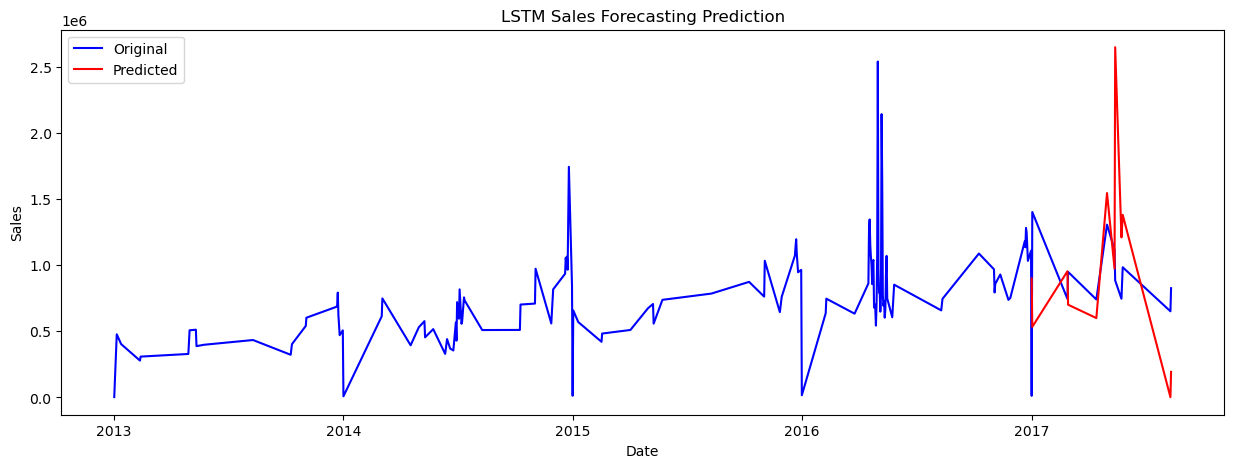

In [156]:
lstm_model(train,test)

In [143]:
def regressive_model(train_data, test_data, model, model_name):
    """Runs regressive models in SKlearn framework. First calls scale_data
    to split into X and y and scale the data. Then fits and predicts. Finally,
    predictions are unscaled, scores are printed, and results are plotted and
    saved."""
    
    # Split into X & y and scale data:
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data,
                                                                 test_data)

    # Run sklearn models:
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test) # y_pred=predictions

    # Undo scaling to compare predictions against original data:
    origin_df = m_df
    unscaled = re_scaling(predictions, X_test, scaler_object) # unscaled_predictions
    unscaled_df = prediction_df(unscaled, origin_df)

    # Print scores and plot results:
    get_scores(unscaled_df, origin_df, model_name)
    plot_results(unscaled_df, origin_df, model_name)

Model: LinearRegression
Root Mean Squared Error (RMSE): 498815.5085221833
Mean Absolute Error (MAE): 394099.6829084417
R-squared (R2): -1.1518752836567363


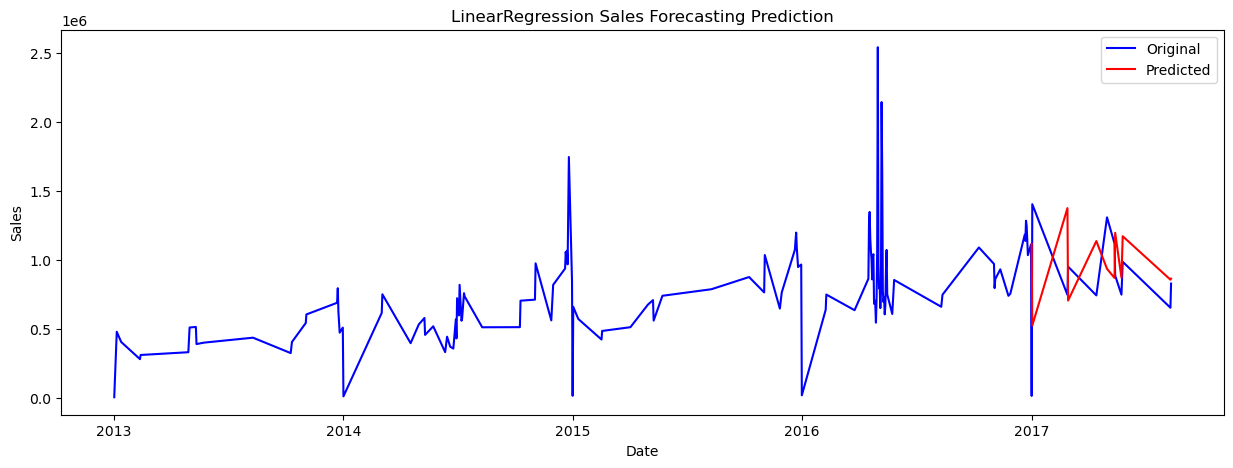

In [144]:
regressive_model(train,test, LinearRegression(), 'LinearRegression')

In [149]:
def lstm_model(train_data, test_data):
    """Runs a long-short-term-memory neural net with 2 dense layers. 
    Generates predictions that are then unscaled. 
    Scores are printed and the results are plotted and saved."""
    # train_data: dataset used to train the model
    # test_data: dataset used to test the model
   
    
    # Split into X & y and scale data:
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
   
    
    # Build LSTM:
    # Définition de l'architecture du modèle LSTM
    model = Sequential()

    # Couche LSTM avec dropout pour prévenir le surapprentissage
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))

    # Couche LSTM
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    # Couche LSTM
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    # Couche dense de sortie
    model.add(Dense(units=1))

    # Compilation du modèle
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Affichage de la structure du modèle
    model.summary()
    model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, 
              shuffle=False)
    predictions = model.predict(X_test,batch_size=1)
    
    # Undo scaling to compare predictions against original data:
    origin_df = m_df
    unscaled = re_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = prediction_df(unscaled, origin_df)
    
    get_scores(unscaled_df, origin_df, 'LSTM')
    plot_results(unscaled_df, origin_df, 'LSTM')
    
    
    


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 50)             12600     
                                                                 
 dropout (Dropout)           (None, 1, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

118/118 [==============================] - 1s 12ms/step - loss: 0.0199
Epoch 179/200
118/118 [==============================] - 2s 14ms/step - loss: 0.0192
Epoch 180/200
118/118 [==============================] - 1s 12ms/step - loss: 0.0146
Epoch 181/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0183
Epoch 182/200
118/118 [==============================] - 1s 7ms/step - loss: 0.0173
Epoch 183/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0195
Epoch 184/200
118/118 [==============================] - 2s 13ms/step - loss: 0.0171
Epoch 185/200
118/118 [==============================] - 1s 11ms/step - loss: 0.0157
Epoch 186/200
118/118 [==============================] - 1s 8ms/step - loss: 0.0161
Epoch 187/200
118/118 [==============================] - 1s 9ms/step - loss: 0.0158
Epoch 188/200
118/118 [==============================] - 1s 13ms/step - loss: 0.0169
Epoch 189/200
118/118 [==============================] - 1s 9ms/step - loss: 0.020

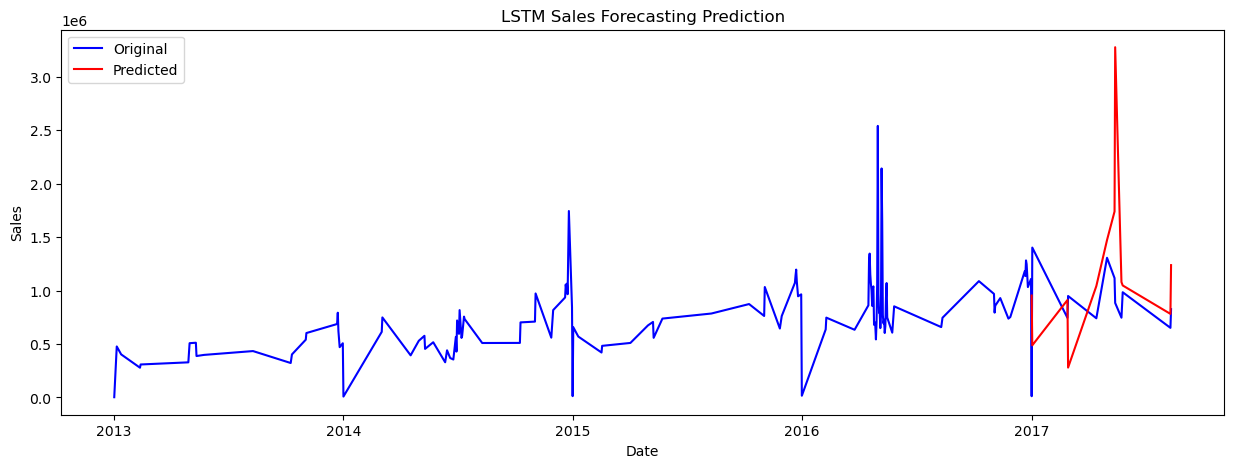

In [150]:
lstm_model(train,test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 1, 50)             12600     
                                                                 
 dropout_9 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_16 (LSTM)              (None, 1, 50)             20200     
                                                                 
 dropout_10 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

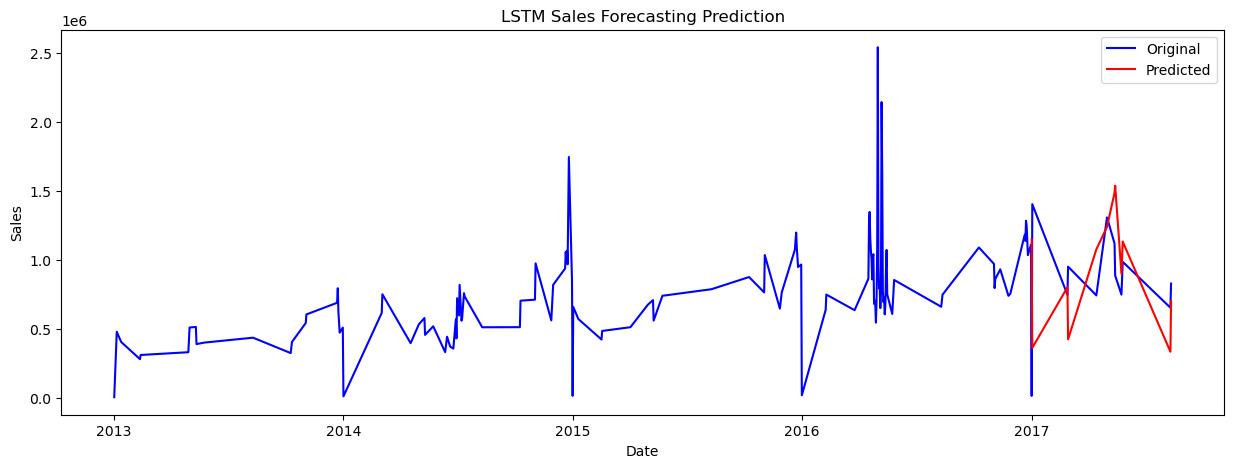

In [153]:
def lstm_model(train_data, test_data):
    """Runs a long-short-term-memory neural net with 2 dense layers. 
    Generates predictions that are then unscaled. 
    Scores are printed and the results are plotted and saved."""
    # train_data: dataset used to train the model
    # test_data: dataset used to test the model
   
    
    # Split into X & y and scale data:
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
   
    
    # Build LSTM:
    # Définition de l'architecture du modèle LSTM
    model = Sequential()

    # Couche LSTM avec dropout pour prévenir le surapprentissage
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))

    # Couche LSTM
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))

    # Couche LSTM
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))

    # Couche dense de sortie
    model.add(Dense(units=1))

    # Compilation du modèle
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Affichage de la structure du modèle
    model.summary()
    model.fit(X_train, y_train, epochs=30, batch_size=1, verbose=1, 
              shuffle=False)
    predictions = model.predict(X_test,batch_size=1)
    
    # Undo scaling to compare predictions against original data:
    origin_df = m_df
    unscaled = re_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = prediction_df(unscaled, origin_df)
    
    get_scores(unscaled_df, origin_df, 'LSTM')
    plot_results(unscaled_df, origin_df, 'LSTM')
    
    
lstm_model(train,test)

In [52]:
import pickle

In [55]:
pickle.dump(model_scores, open( "model_scores.p", "wb" ))

# Comparing Models


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
def create_results_df():
    results_dict = pickle.load(open("model_scores.p", "rb"))
    
    #results_dict.update(pickle.load(open("ARIMAmodel_scores.p", "rb")))
    
    results_df = pd.DataFrame.from_dict(results_dict, orient='index', 
                                        columns=['RMSE', 'MAE','R2'])
    
    results_df = results_df.sort_values(by='RMSE', ascending=False).reset_index()
    
    results_df.to_csv('C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/results.csv')
    
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.lineplot(np.arange(len(results_df)), 'RMSE', data=results_df, ax=ax, 
                 label='RMSE', color='darkblue')
    sns.lineplot(np.arange(len(results_df)), 'MAE', data=results_df, ax=ax, 
                 label='MAE', color='Cyan')
    
    plt.xticks(np.arange(len(results_df)),rotation=45)
    ax.set_xticklabels(results_df['index'])
    ax.set(xlabel = "Model",
           ylabel = "Scores",
           title = "Model Error Comparison")
    sns.despine()
    
    plt.savefig(f'C:/Users/pc/Desktop/projet_class/Python_project/store-sales-time-series-forecasting/model_output/compare_models.png')
    
    return results_df
    

TypeError: lineplot() got multiple values for argument 'data'

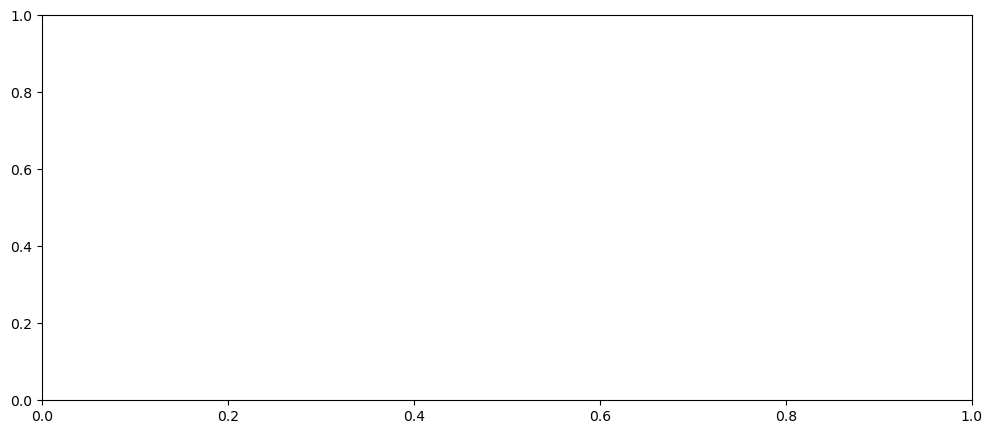

In [60]:
results = create_results_df()
results